<a href="https://colab.research.google.com/github/mostafa-ja/sample/blob/master/nn_RNN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [8]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')

# torch.nn.RNN()
input_size(H_in) – The number of expected features in the input x

hidden_size(H_out) – The number of features in the hidden state h

num_layers – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results. Default: 1

nonlinearity – The non-linearity to use. Can be either 'tanh' or 'relu'. Default: 'tanh'

bias – If False, then the layer does not use bias weights b_ih and b_hh. Default: True

batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states. See the Inputs/Outputs sections below for details. Default: False

dropout – If non-zero, introduces a Dropout layer on the outputs of each RNN layer except the last layer, with dropout probability equal to dropout. Default: 0

bidirectional(D) – If True, becomes a bidirectional RNN. Default: False

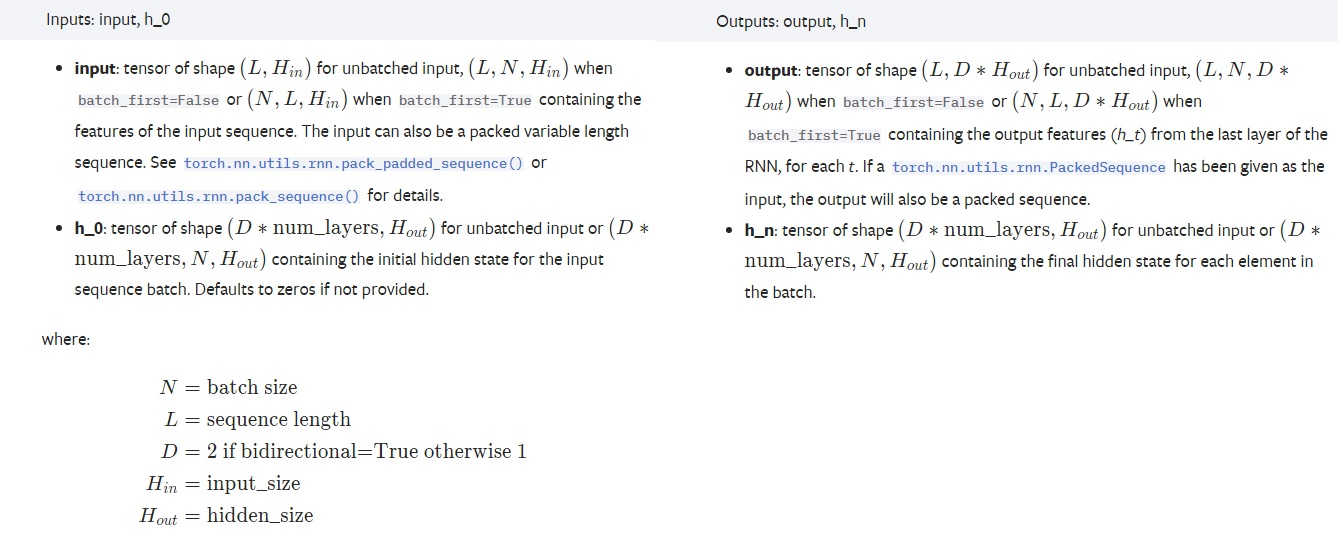

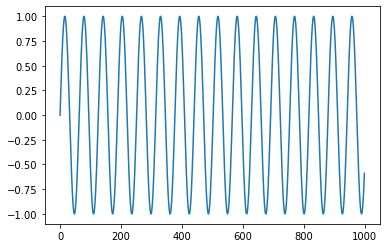

In [9]:
N = 1000
series = np.sin(0.1*np.arange(N)) # + np.random.randn(N) * 0.1
plt.plot(series);

in this example we give f(t:t+L) input to RNN and it predicts f(t+L) (10 steps we give data and RNN predicts 11th step) ,so L=10 

every time X(input)goes forward one step so , N=990 and H_in=1(each t we give one elemet) so X.shape = (990,10,1)



In [10]:
a = np.arange(100)
b=a[:10]
c=a[10]
print(b,c)

[0 1 2 3 4 5 6 7 8 9] 10


In [11]:
L = 10
Y = []
X = []
for t in range(N-L):
  x = series[t:t+L]
  X.append(x)
  y = series[t+10]
  Y.append(y)

X = np.array(X).reshape(-1,L,1)
Y = np.array(Y).reshape(-1,1)

In [12]:
print(X[:2],'\n',Y[:2])

[[[0.        ]
  [0.09983342]
  [0.19866933]
  [0.29552021]
  [0.38941834]
  [0.47942554]
  [0.56464247]
  [0.64421769]
  [0.71735609]
  [0.78332691]]

 [[0.09983342]
  [0.19866933]
  [0.29552021]
  [0.38941834]
  [0.47942554]
  [0.56464247]
  [0.64421769]
  [0.71735609]
  [0.78332691]
  [0.84147098]]] 
 [[0.84147098]
 [0.89120736]]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,test_size=0.2,shuffle=False
)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(792, 10, 1) (198, 10, 1) (792, 1) (198, 1)


In [14]:
X_train = torch.from_numpy(X_train.astype(np.float32)).to(device)
X_test = torch.from_numpy(X_test.astype(np.float32)).to(device)
Y_train = torch.from_numpy(Y_train.astype(np.float32)).to(device)
Y_test = torch.from_numpy(Y_test.astype(np.float32)).to(device)

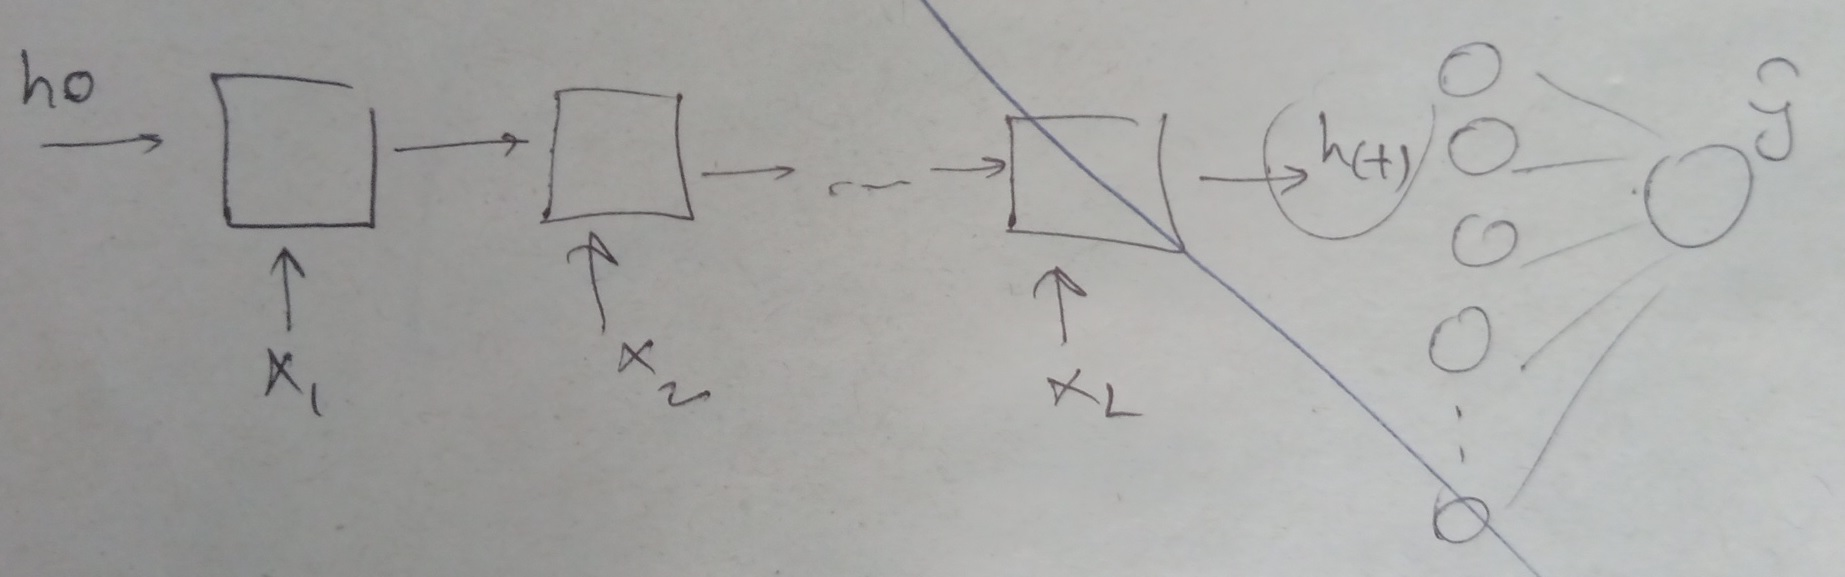

In [15]:
class SimpleRNN(nn.Module):
  def __init__(self,n_input,n_hidden,n_layers,n_output):
    super().__init__()
    self.H_out = n_hidden
    self.n_layers = n_layers
    
    self.rnn = nn.RNN(input_size=n_input,
                      hidden_size=n_hidden,
                      num_layers=n_layers,
                      nonlinearity='relu',
                      batch_first=True,
                      )
    self.fc = nn.Linear(n_hidden,n_output)

  def forward(self,x):
    h0 = torch.zeros(self.n_layers,x.shape[0],self.H_out).to(device) 
    out,_ = self.rnn(x,h0)
    # we only want output features (h_t) of the final step t
    out = self.fc(out[:,-1,:])

    return out


In [16]:
model = SimpleRNN(n_input=1,n_hidden=5,n_layers=1,n_output=1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [17]:
X_train_loader = torch.utils.data.DataLoader(X_train,batch_size=1)
Y_train_loader = torch.utils.data.DataLoader(Y_train,batch_size=1)
print(next(iter(X_train_loader)).shape)
print(next(iter(Y_train_loader)).shape)

torch.Size([1, 10, 1])
torch.Size([1, 1])


In [18]:
X_train[0:1].shape

torch.Size([1, 10, 1])

In [19]:
model(X_train[0:1]).shape

torch.Size([1, 1])

In [20]:
criterion(model(X_train[0:1]),Y_train[0:1])

tensor(0.3527, device='cuda:0', grad_fn=<MseLossBackward0>)

In [21]:
Y_train[0:1].shape

torch.Size([1, 1])

____________________ Epoch : 1/3 ____________________
step 50/792 : accuracy = 0.2057979110366614
step 100/792 : accuracy = 0.16273347526872384
step 150/792 : accuracy = 0.058701085454731586
step 200/792 : accuracy = 0.018213815119233912
step 250/792 : accuracy = 0.03654713323514443
step 300/792 : accuracy = 0.02375839041051222
step 350/792 : accuracy = 0.023952558899509313
step 400/792 : accuracy = 0.020391013218331863
step 450/792 : accuracy = 0.019629723227699288
step 500/792 : accuracy = 0.0187749332076055
step 550/792 : accuracy = 0.020503197790621926
step 600/792 : accuracy = 0.014603653115918859
step 650/792 : accuracy = 0.017023745149369097
step 700/792 : accuracy = 0.023430447774589993
step 750/792 : accuracy = 0.01129113989893085
____________________ Epoch : 2/3 ____________________
step 50/792 : accuracy = 0.2057979110366614
step 100/792 : accuracy = 0.16273347526872384
step 150/792 : accuracy = 0.058701085454731586
step 200/792 : accuracy = 0.018213815119233912
step 250/792

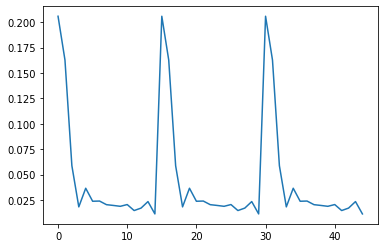

In [22]:
model.train()
num_epochs=3
losses = []
acc = []
for epoch in range(num_epochs):
  print(f'{"_"*20} Epoch : {epoch+1}/{num_epochs} {"_"*20}')
  for i in range(X_train.shape[0]):
    y_pred = model(X_train[i:i+1])
    loss = criterion(y_pred,Y_train[i:i+1])
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i+1)%50 == 0:
      accuracy = sum(losses[i-49:i])/100.
      print(f'step {i+1}/{X_train.shape[0]} : accuracy = {accuracy}')
      acc.append(accuracy)

plt.plot(acc)

In [23]:
model.eval()
y_pred = model(X_test).cpu().detach().numpy()

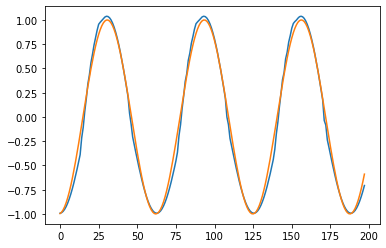

In [24]:
plt.plot(y_pred)
plt.plot(Y_test.cpu().detach().numpy())